In [1]:
# Download using HuggingFace
!pip install datasets
from datasets import load_dataset
ds = load_dataset("Pradeep016/career-guidance-qa-dataset")


  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached xxhash-3.5.0-cp39-cp39-win_amd64.whl.metadata (13 kB)
  Using cached multiprocess-0.70.16-py39-none-any.whl.metadata (7.2 kB)
  Using cached PyYAML-6.0.2-cp39-cp39-win_amd64.whl.metadata (2.1 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached async_timeout-5.0.1-py3-none-any.whl.metadata (5.1 kB)
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
Using cached multiprocess-0.70.16-py39-none-any.whl (133 kB)
Using cached async_timeout-5.0.1-py3-none-any.whl (6.2 kB)
Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl (15 kB)
Using cached aiosignal-1.3.2-py2.py3-none-any.whl (7.6 kB)
Using cached PyYAML-6.0.2-cp39-cp39-win_amd64.whl (162 kB)
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
Using cached xxhash-3.5.0-cp39-cp39-win_amd64.w

c:\Users\yuvan\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\yuvan\anaconda3\envs\myenv\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yuvan\.cache\huggingface\hub\datasets--Pradeep016--career-guidance-qa-dataset. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In orde

In [3]:
from datasets import load_dataset
import pandas as pd

# Load dataset
dataset = load_dataset("Pradeep016/career-guidance-qa-dataset")

# Convert HuggingFace dataset to Pandas DataFrame
df = pd.DataFrame(dataset['train'])
df.head()


,role,question,answer
0,Data Scientist,What does a Data Scientist do?,A Data Scientist extracts meaningful insights ...
1,Data Scientist,What are the main responsibilities of a Data S...,"Responsibilities include data cleaning, analyz..."
2,Data Scientist,What is the job description for a Data Scientist?,A Data Scientist is responsible for collecting...
3,Data Scientist,What skills are required to become a Data Scie...,Skills required include expertise in Python or...
4,Data Scientist,What are the essential skills for a successful...,A successful Data Scientist needs strong analy...


C:\Users\yuvan\AppData\Local\Temp\ipykernel_23704\3867559527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_counts.values, y=role_counts.index, palette='Set2')


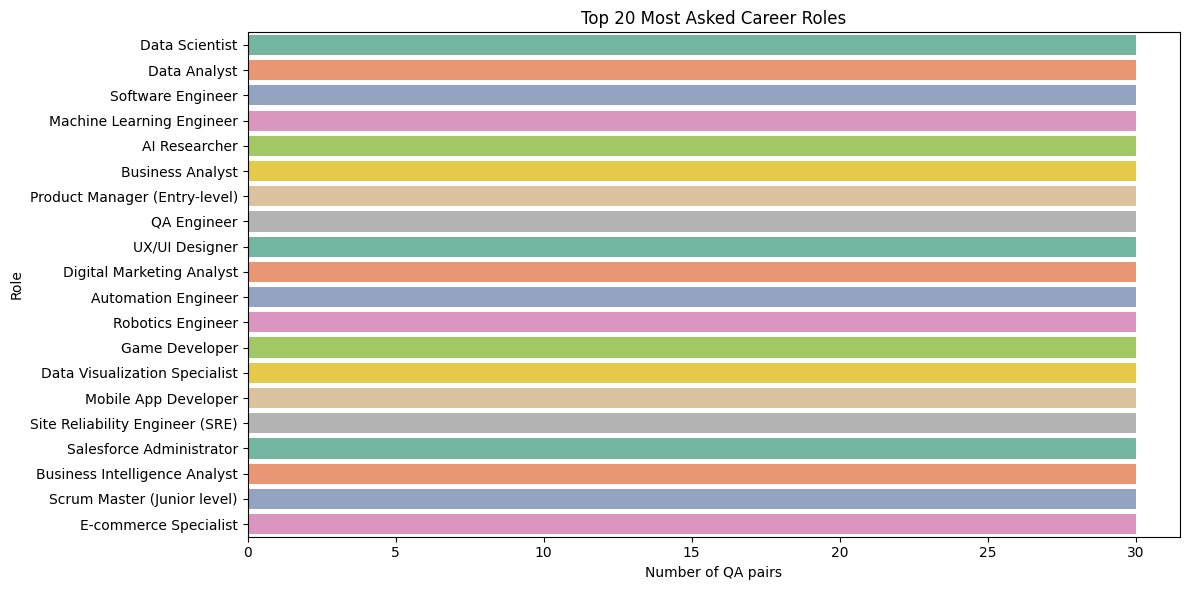

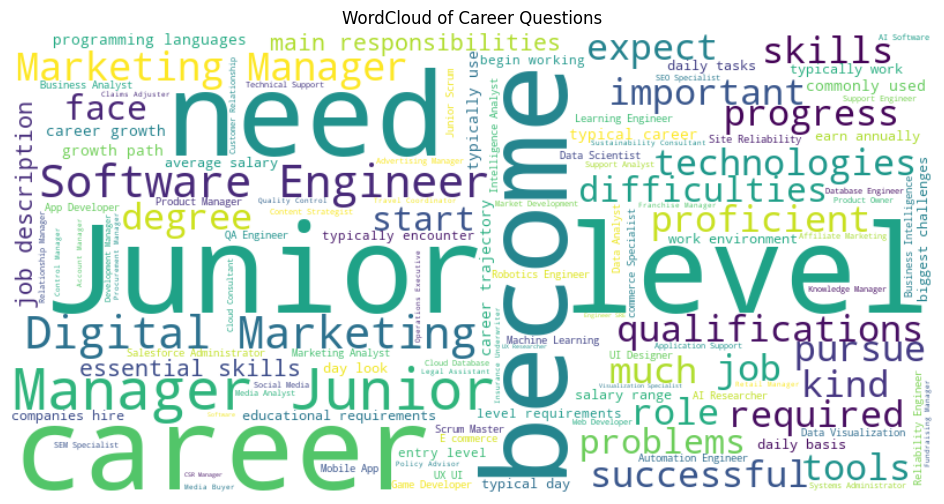

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Plot distribution of roles
plt.figure(figsize=(12,6))
role_counts = df['role'].value_counts().head(20)
sns.barplot(x=role_counts.values, y=role_counts.index, palette='Set2')
plt.title("Top 20 Most Asked Career Roles")
plt.xlabel("Number of QA pairs")
plt.ylabel("Role")
plt.tight_layout()
plt.show()

# Word Cloud of Questions
from wordcloud import WordCloud, STOPWORDS
text = " ".join(df['question'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(STOPWORDS)).generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Career Questions")
plt.show()


In [15]:
pip install keras tensorflow tf-keras keras-nightly keras2onnx 


  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached tensorflow-2.19.0-cp39-cp39-win_amd64.whl.metadata (4.1 kB)
  Using cached tf_keras-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of onnxconverter-common to determine which version is compatible with other requirements. This could take a while.
Using cached keras-3.10.0-py3-none-any.whl (1.4 MB)
Using cached tensorflow-2.19.0-cp39-cp39-win_amd64.whl (375.7 MB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 1.7 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 M

  DEPRECATION: Building 'fire' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'fire'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [16]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the model (100% PyTorch)
model = SentenceTransformer('all-MiniLM-L6-v2')  # No TF dependency

# Prepare corpus
corpus = df['question'].tolist()
corpus_embeddings = model.encode(corpus, show_progress_bar=True)


Batches: 100%|██████████| 51/51 [00:02<00:00, 24.79it/s]


In [17]:
    import pickle

# Save everything
pickle.dump(df, open("career_df.pkl", "wb"))
np.save("career_embeddings.npy", corpus_embeddings)
model.save("career_embedding_model")


In [19]:
extra_questions = [
    "What should I do after B.Sc Computer Science?",
    "Career path after mechanical engineering?",
    "How to become a data scientist?",
    "What are government jobs after 12th science?"
]

extra_answers = [
    "You can go for MCA or M.Sc CS or look for developer jobs.",
    "Consider GATE for M.Tech or apply in manufacturing firms.",
    "Learn Python, statistics, ML and build portfolio projects.",
    "You can try SSC, Indian Railways, or NDA."
]


In [20]:
import pickle
from sentence_transformers import SentenceTransformer
import numpy as np

# Load existing data
df = pickle.load(open(r"D:\ML PROJECTS\AI Virtual Career Counsellor\career_df.pkl", "rb"))

# Append new data
new_df = pd.DataFrame({"question": extra_questions, "answer": extra_answers})
df_updated = pd.concat([df, new_df], ignore_index=True)

# Re-encode all questions
model = SentenceTransformer(r"D:\ML PROJECTS\AI Virtual Career Counsellor\career_embedding_model")
corpus_embeddings = model.encode(df_updated['question'].tolist(), show_progress_bar=True)

# Save
pickle.dump(df_updated, open(r"D:\ML PROJECTS\AI Virtual Career Counsellor\career_df.pkl", "wb"))
np.save(r"D:\ML PROJECTS\AI Virtual Career Counsellor\career_embeddings.npy", corpus_embeddings)


Batches: 100%|██████████| 51/51 [00:02<00:00, 24.64it/s]


In [21]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics import accuracy_score

# Load saved files
import pickle
df = pickle.load(open(r"D:\ML PROJECTS\AI Virtual Career Counsellor\career_df.pkl", "rb"))
corpus = df['question'].tolist()
corpus_answers = df['answer'].tolist()
corpus_embeddings = np.load(r"D:\ML PROJECTS\AI Virtual Career Counsellor\career_embeddings.npy")

model = SentenceTransformer(r"D:\ML PROJECTS\AI Virtual Career Counsellor\career_embedding_model")

# Evaluation set: Simulate by selecting N samples
evaluation_samples = [
    ("What should I do after B.Sc Computer Science?", "You can go for MCA or M.Sc CS or look for developer jobs."),
    ("Career path after mechanical engineering?", "Consider GATE for M.Tech or apply in manufacturing firms."),
    ("How to become a data scientist?", "Learn Python, statistics, ML and build portfolio projects."),
    ("What are government jobs after 12th science?", "You can try SSC, Indian Railways, or NDA."),
]

# Evaluation
def evaluate_semantic_search(evaluation_samples, top_k=3):
    hits = 0

    for query, true_answer in evaluation_samples:
        query_embedding = model.encode([query])[0]
        similarities = cosine_similarity([query_embedding], corpus_embeddings)[0]
        top_k_indices = similarities.argsort()[-top_k:][::-1]
        top_k_answers = [corpus_answers[i] for i in top_k_indices]

        if true_answer in top_k_answers:
            hits += 1
        else:
            print(f"Missed:\nQuery: {query}\nExpected: {true_answer}\nTop {top_k} Ans: {top_k_answers}\n")

    recall_at_k = hits / len(evaluation_samples)
    print(f"\n✅ Recall@{top_k}: {recall_at_k:.2f}")

evaluate_semantic_search(evaluation_samples, top_k=3)



✅ Recall@3: 1.00
